In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from arnie.mfe import mfe
from arnie.pfunc import pfunc
from arnie.bpps import bpps
from ipynb.draw import draw_struct
from RiboGraphViz import RGV
openai  ='open -a "Adobe Illustrator"'
import sys, os
import eternabench as eb
DATA_PATH = os.environ['ETERNABENCH_PATH']+'/scoring_data/'

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_json('../data/EternaBench_Riboswitch_FULL_07Aug2021.json.zip')
df['log_AR'] = np.log(df['Activation Ratio'])
df['Length'] = [len(x) for x in df['sequence']]
df['GC content'] = [(x.count('G')+x.count('C'))/len(x) for x in df['sequence']]

In [12]:
df['split'] = np.where(df['Dataset'].str.contains('Ribologic'),'Train','Test')

In [15]:
df[['GC content','Length', 'KDON','KDOFF','min_kd_val','Activation Ratio','split']].groupby('split').median()

,GC content,Length,KDON,KDOFF,min_kd_val,Activation Ratio
split,,,,,,
Test,0.459459,84,27.383923,52.942920,1.631784,1.460000
Train,0.472973,84,19.939434,26.886432,3.008213,1.182301


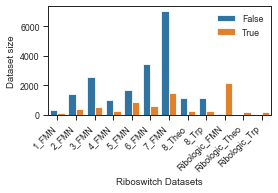

In [8]:
figure(figsize=(4,2))
tmp = df.groupby(['Dataset','passed_CDHIT_filter']).size()
tmp = tmp.reset_index()
sns.barplot(x='Dataset', y=0, data=tmp,hue='passed_CDHIT_filter')
xticks(rotation=45,horizontalalignment='right')
legend(frameon=False)

ylabel('Dataset size')
xlabel('Riboswitch Datasets')
savefig('FIGURES/SI/Figure_S3C.pdf',bbox_inches='tight')


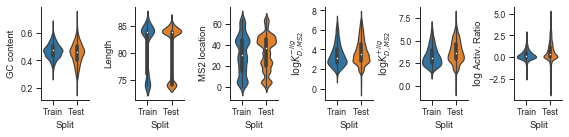

In [22]:
figure(figsize=(8,2))

titles=['GC content','Length','MS2 location', r'$\log K_{D,MS2}^{-lig}$',r'$\log K_{D,MS2}^{+lig}$',r'$\log$ Activ. Ratio']

for i, metric in enumerate(['GC content','Length','MS2 location', 'logkd_nolig','logkd_lig','log_AR']):
    subplot(1,6,i+1)
    sns.violinplot(x='split', y=metric, data=df)
    
    #ylim([ymin[i],ymaxes[i]])
    ax=gca()
    xlabel('Split')
    ylabel(titles[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S14B.pdf',bbox_inches='tight')


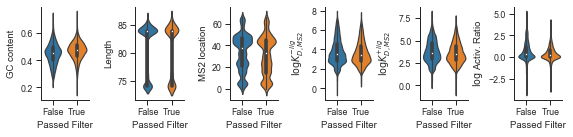

In [20]:
figure(figsize=(8,2))

titles=['GC content','Length','MS2 location', r'$\log K_{D,MS2}^{-lig}$',r'$\log K_{D,MS2}^{+lig}$',r'$\log$ Activ. Ratio']

for i, metric in enumerate(['GC content','Length','MS2 location', 'logkd_nolig','logkd_lig','log_AR']):
    subplot(1,6,i+1)
    sns.violinplot(x='passed_CDHIT_filter', y=metric, data=df)
    
    #ylim([ymin[i],ymaxes[i]])
    ax=gca()
    xlabel('Passed Filter')
    ylabel(titles[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S3D.pdf',bbox_inches='tight')


In [21]:
tmp = df[['KDOFF','KDON','min_kd_val', 'Activation Ratio', 'Length', 'GC content','Dataset']].groupby('Dataset').median()
tmp['Dataset kind'] = 'Full'
tmp = tmp.reset_index()

tmp2 = df.loc[df.passed_CDHIT_filter][['KDOFF','KDON','min_kd_val', 'Activation Ratio', 'Length', 'GC content','Dataset']].groupby('Dataset').median()
tmp2['Dataset kind'] = 'Filtered'
tmp2.reset_index()

tmp = tmp.append(tmp2, ignore_index=True)

tmp.to_excel('riboswitch_metadata.xlsx')